In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['savefig.dpi'] = 300

import seaborn as sns

from tqdm.auto import tqdm

import time
import os
import json
import pickle

import gc

import sys
sys.path.append("../")

from src.helpers import calculate_RMSE_balanced, calculate_RMSE, Timer, autoscaling, \
                        calculate_composite_RMSE_V_CaT, update_array_from_kwargs, get_value_by_key

from src.postprocessing import collect_results, create_C_S

from src.visualization import plot_waveforms

idx = pd.IndexSlice

# cluster_name = "pikunov.av@calc.cod.phystech.edu"
cluster_name = "-o ProxyJump=\"visitor@dodo.inm.ras.ru\" pikunov@cluster2.inm.ras.ru" 

# From cluster

In [2]:
s = input()

['/'.join(x.split('/')[-3:]) for x in s.split() if 'results' in x]

 # output_folder_name was set to /data90t/biomath/pikunov/pypoptim/results/koivumaki/syn/210413_134829 # output_folder_name was set to /data90t/biomath/pikunov/pypoptim/results/koivumaki/syn/210413_154449 # output_folder_name was set to /data90t/biomath/pikunov/pypoptim/results/koivumaki/syn/210413_174037 # output_folder_name was set to /data90t/biomath/pikunov/pypoptim/results/koivumaki/syn/210413_193747 # output_folder_name was set to /data90t/biomath/pikunov/pypoptim/results/koivumaki/syn/210413_213549 # output_folder_name was set to /data90t/biomath/pikunov/pypoptim/results/koivumaki/syn/210413_233310 # output_folder_name was set to /data90t/biomath/pikunov/pypoptim/results/koivumaki/syn/210414_013111


['koivumaki/syn/210413_134829',
 'koivumaki/syn/210413_154449',
 'koivumaki/syn/210413_174037',
 'koivumaki/syn/210413_193747',
 'koivumaki/syn/210413_213549',
 'koivumaki/syn/210413_233310',
 'koivumaki/syn/210414_013111']

In [14]:
s = input()

['/'.join(x.split('/')[-1:]) for x in s.split() if 'results' in x]

 # output_folder_name was set to /data90t/biomath/pikunov/pypoptim/results/koivumaki/syn/210408_193146 # output_folder_name was set to /data90t/biomath/pikunov/pypoptim/results/koivumaki/syn/210408_213459 # output_folder_name was set to /data90t/biomath/pikunov/pypoptim/results/koivumaki/syn/210408_233001 # output_folder_name was set to /data90t/biomath/pikunov/pypoptim/results/koivumaki/syn/210409_013215 # output_folder_name was set to /data90t/biomath/pikunov/pypoptim/results/koivumaki/syn/210409_032943 # output_folder_name was set to /data90t/biomath/pikunov/pypoptim/results/koivumaki/syn/210409_053423 # output_folder_name was set to /data90t/biomath/pikunov/pypoptim/results/koivumaki/syn/210409_072735


['210408_193146',
 '210408_213459',
 '210408_233001',
 '210409_013215',
 '210409_032943',
 '210409_053423',
 '210409_072735']

In [ ]:
folder_name_src = "/home/common/pikunov.av/pypoptim/results/voigt"
folder_name_dst = "../results/koivumaki/voigt"

folder_name_dst = os.path.abspath(folder_name_dst)

case_list = "G1/C1/210122_051129", "G2/C2/210122_082053", "G3/C1/210121_212326", "G4/C8/210122_001806"
#case_list = "G1/C1/210122_221831", "G2/C2/210123_122249", "G3/C1/210122_142150", "G4/C8/210123_031303"

case_list = "G1/C3/210126_181937", "G2/C4/210127_032432", "G3/C2/210127_141706"

case_list = "G1/C2/210203_181931", "G2/C2/210204_030703", 
case_list += 'G3/C5/210204_094751', 'G4/C3/210204_174434', 'G4/C4/210205_013028', 'G4/C2/210205_095852'

# # kernik
# folder_name_src = "/home/common/pikunov.av/pypoptim/results/kernik_clancy/syn"
# folder_name_dst = "../results/kernik_clancy/syn"
case_list = "210206_175442", "210206_201628"

case_list = "210210_111426", "210211_064429",# "210209_223739", # "210208_185315",# "210208_142104", "210208_144953"#"210208_115045", "210208_111459", "210208_144953", 


# # fluo
# folder_name_src = "/home/common/pikunov.av/pypoptim/results/voigt/fluo/koivumaki"
# folder_name_dst = "../results/voigt/fluo/koivumaki"

case_list = "G1/C2/210217_143655",
case_list = "G1/C3/210217_160358", 

case_list = "G1/C3/210217_214917", "G1/C2/210218_072123"

case_list = "G1/C3/210220_184406", "G1/C2/210221_032353", "G2/C2/210221_135226", "G3/C5/210222_010834", "G4/C3/210222_121848"

case_list = "G1/C3/210225_002135", "G1/C2/210225_091843", "G2/C2/210225_191126"

case_list = "G1/C3/210228_152951", "G1/C3/210301_044325"

case_list = "G1/C3/210302_121858", "G1/C3/210302_201722", "G1/C3/210302_122638", "G1/C3/210302_211713"

In [128]:
# koivumaki voigt fluo
cluster_name = "pikunov.av@calc.cod.phystech.edu"
folder_name_src = "/home/common/pikunov.av/pypoptim/results/voigt/fluo/koivumaki"
folder_name_dst = "../results/voigt/fluo/koivumaki"

#calc
case_list = ['G1/C3/210330_221107']
# case_list = ['G1/C2/210317_121042',
#  'G2/C2/210318_064358',
#  'G3/C5/210319_082302',
#  'G4/C3/210320_005430']

# case_list = ['G1/C2/210320_195816',
#  'G2/C2/210321_034945',
#  'G3/C5/210321_121346',
#  'G4/C3/210321_200601',
#  'G4/C4/210322_021113',
#  'G4/C2/210322_090126']

# case_list += ['G1/C1/210321_205132',
#  'G1/C3/210322_065821',
#  'G2/C1/210322_164908',
#  'G2/C3/210323_101614']

In [3]:
cluster_name = "-o ProxyJump=\"visitor@dodo.inm.ras.ru\" pikunov@cluster2.inm.ras.ru" 
folder_name_src = "/data90t/biomath/pikunov/pypoptim/results/voigt/fluo/koivumaki"
folder_name_dst = "../results/voigt/fluo/koivumaki"


# #INM
# case_list += ['G1/C2/210317_171137',
#  'G2/C2/210317_200111',
#  'G3/C5/210318_000452',
#  'G4/C3/210318_023419']

# case_list += ['G1/C2/210320_135029',
#  'G2/C2/210320_161855',
#  'G3/C5/210320_194441',
#  'G4/C3/210320_220329',
#  'G4/C4/210321_001246']

# case_list = ['G1/C3/210329_202403',
#  'G1/C2/210329_213731',
#  'G2/C2/210329_230350',
#  'G3/C5/210330_011124',
#  'G4/C3/210330_022607',
#  'G4/C4/210330_034054',
#  'G4/C2/210330_050814',
#  'G4/C1/210330_062930']

# CaT_Shared
case_list = ['G1/C3/210330_225356',
 'G1/C2/210331_001124',
 'G2/C2/210331_013932',
 'G3/C5/210331_034105',
 'G4/C3/210331_045238',
 'G4/C4/210331_060241',
 'G4/C2/210331_072253',
 'G4/C1/210331_083730']

case_list += [# 'G1/C3/210331_184811',
 'G2/C1/210331_202044',
 'G2/C3/210331_224948',
 'G2/C4/210401_002027',
 'G3/C1/210401_015226',
 'G3/C2/210401_032417',
 'G3/C3/210401_045611',
 # 'G3/C4/210401_061854',
             ]

case_list += ['G1/C1/210404_122656',
              'G3/C4/210404_140451',
 'G4/C5/210404_154645',
 'G4/C6/210404_171701',
 'G4/C7/210404_203302',
 #'G4/C8/210404_235707',
 'G4/C8/210405_151337']

# rel
#case_list = ['G1/C3/210331_154117', 'G4/C1/210331_181459']

In [4]:
case_list =  ['G4/C1/210331_083730',
              'G4/C1/210407_180923',
              'G4/C1/210407_184929',
              'G4/C1/210407_192955',
              'G4/C1/210407_201034',
              
 'G4/C7/210404_203302',
 'G4/C7/210407_205049',
 'G4/C7/210407_213221',
 'G4/C7/210407_221337',
 'G4/C7/210407_225515']

In [5]:
# rel vs normal
case_list = ['G1/C3/210331_154117', 'G1/C3/210331_184811', 'G1/C3/210330_225356',
             'G4/C1/210331_181459', 'G4/C1/210331_083730']

In [40]:
# grandi fluo

cluster_name = "-o ProxyJump=\"visitor@dodo.inm.ras.ru\" pikunov@cluster2.inm.ras.ru" 
folder_name_src = "/data90t/biomath/pikunov/pypoptim/results/voigt/fluo/grandi"
folder_name_dst = "../results/voigt/fluo/grandi"

case_list = ['G1/C3/210329_204654',
 'G1/C2/210329_210003',
 'G2/C2/210329_211358',
 'G3/C5/210329_212600',
 'G4/C3/210329_213920',
 'G4/C4/210329_215233',
 'G4/C2/210329_220545',
 'G4/C1/210329_221844']

case_list = ['G1/C3/210330_233855',
 'G1/C2/210330_234934',
 'G2/C2/210331_000126',
 'G3/C5/210331_001125',
 'G4/C3/210331_002240',
 'G4/C4/210331_003345',
 'G4/C2/210331_004523',
 'G4/C1/210331_005710']

In [ ]:
# rheeda
folder_name_src = "/home/common/pikunov.av/pypoptim/results/maleckar/voigt/"

folder_name_dst = "../results/maleckar/voigt"

case_list = ["G1/C1/210309_183557", "G1/C1/210309_184248", "G1/C1/210310_232739", "G1/C1/210310_132407",
             "G2/C2/210309_185119", "G2/C2/210310_200410", "G2/C2/210310_115504", "G2/C2/210309_185044",
             "G3/C1/210310_001850", "G3/C1/210310_031312", "G3/C1/210310_083840", "G3/C1/210310_155848",
             "G4/C4/210310_022323", "G4/C4/210310_051531", "G4/C4/210310_070358", "G4/C4/210310_112458"]

In [34]:
# grandi syn
folder_name_src = "/home/common/pikunov.av/pypoptim/results/grandi/syn"
folder_name_dst = "../results/grandi/syn"

true_path = "../data/grandi/syn/phenotypes"
items = ['Na_i', 'Ca_sr', 'K_i']

# v
case_list = ["210310_223451", "210311_000513", "210311_013721", "210311_025338", "210311_042913",\
            "210311_062128", "210311_075523", "210311_093706", "210311_110839", "210311_125300"]

n_v = len(case_list)

# v & cai
case_list += ['210311_201931',
 '210311_212910',
 '210311_225250',
'210312_003349',
 '210312_015135',
 '210312_033123',
             ]

In [79]:
# maleckar syn
folder_name_src = "/home/common/pikunov.av/pypoptim/results/maleckar/syn"
folder_name_dst = "../results/maleckar/syn"

true_path = "../data/maleckar/original/phenotypes"
items = ['Na_i', 'Ca_rel', 'K_i']

# v
case_list = ['210310_225257',
 '210311_013640',
 '210311_032555',
 '210311_054743',
 '210311_073531',
 '210311_094906',
 '210311_115017',
 '210311_135420',
 #'210311_160744',  broken
 '210311_161211']

n_v = len(case_list)

# v & cai
case_list += ['210311_202842',
 '210311_222521',
 '210312_004138',
 '210312_023219',
 '210312_051724'] + ['210313_151517',
 '210313_182307',
 '210313_214123',
 '210314_001940',
 '210314_025419',
 '210314_052745',
 '210314_082104',
 '210314_114224',
 '210314_145656',
 '210314_175726']

In [18]:
# koivumaki syn
folder_name_src = "~/pypoptim/results/koivumaki/syn"
folder_name_dst = "../results/koivumaki/syn"

true_path = "../data/koivumaki/original/phenotypes"
items = ['Nai', 'CaSR', 'Ki']

# v
case_list = ['210311_225305',
 '210312_051614',
 '210312_113740',
 '210312_180918',
 '210313_002351',
 '210313_070541',
 '210313_130459', # broken
 ]

n_v = len(case_list)

# v ca
# case_list += ['210311_225555', '210312_090417'] + ['210313_151417',
#  '210313_213301',
#  '210314_040130',
#  '210314_103504',
#  '210314_165914',
#  '210314_235019',
#  '210315_061328',
#  #'210315_123458', # broken 
# ]

case_list += ['210317_115717', '210317_183542', '210318_011304', '210318_075304']

# fixed SERCA multiplier

# AP
case_list = ['210408_193146',
 '210408_213459',
 '210408_233001',
 '210409_013215',
 '210409_032943',
 '210409_053423',
 #'210409_072735',
            ]

# # CaT
# case_list = ['210413_134829',
#  '210413_154449',
#  '210413_174037',
#  '210413_193747',
#  '210413_213549',
#  '210413_233310',
#  '210414_013111']

In [15]:
# timofeev
folder_name_src = "/home/common/pikunov.av/pypoptim/results/timofeev/rec18/"
folder_name_dst = "../results/timofeev/rec18"

cluster_name = "-o ProxyJump=\"visitor@dodo.inm.ras.ru\" pikunov@cluster2.inm.ras.ru" 
folder_name_src = "/data90t/biomath/pikunov/pypoptim/results/timofeev/rec18/"

case_list = ['210407_233856']

In [16]:
item_list = ['dump_last.npy',
             # 'dump.bin',
             'genes_best.csv',
             'dump_elite.npy',
             #'organism_best.pickle',
             'phenotype/*.csv',
             'config_backup.pickle']

text = ""

for case in case_list:
    
    folder_name = os.path.join(folder_name_dst, case)
    os.makedirs(folder_name, exist_ok=True)
    
    for item in item_list:
        src = os.path.join(folder_name_src, case, item)
        head, _ = os.path.split(item)
        if head:
            dst = os.path.join(folder_name_dst, case, head)
            os.makedirs(dst, exist_ok=True)
        else:
            dst = os.path.join(folder_name_dst, case)
            
        dst = os.path.abspath(dst)
            
        request = f"scp -r {cluster_name}:{src} {dst}\n"
        text += request
        
filename_script = "../misc/from_cluster.sh"
with open(filename_script, 'w') as f:
    f.write(text)

In [ ]:
!bash ../misc/from_cluster.sh

# Data loading

In [ ]:
case_list = 'G3/C1/201224_215531', 'G3/C1/201224_210103', 'G3/C1/201223_220723', 
#case_list = 'G4/C8/201223_232912',
#case_list = 'G2/C2/201224_125711',
#case_list = 'G1/C1/201225_092709',

case_list = 'G3/C1/201223_220723', 
case_list = 'G3/C1/210113_133246',
case_list = 'G3/C1/210114_012849',

case_list = 'G3/C1/210114_153411',
#case_list = 'G3/C1/210114_154059',
#case_list = 'G3/C1/210114_154032',

#case_list = 'G3/C1/210114_153411', 'G3/C1/210114_154059', 'G3/C1/210114_154032'

# ical_ghk
# case_list = "G1/C1/210115_115857", # 3D ok
# case_list = "G2/C2/210115_183711", # 3D ok
case_list = 'G3/C1/210114_153411', 'G3/C1/210115_113955',
case_list = "G4/C8/210116_070854",

# case_list = "G1/C1/210115_115857", "G2/C2/210115_183711", 'G3/C1/210114_153411', "G4/C8/210116_070854"

# ical_ghk_tor
# case_list = "G1/C1/210118_200016",
# case_list = "G2/C2/210119_054105",
# case_list = "G3/C1/210118_195415",
# case_list = "G4/C8/210120_003000",

# case_list = "G1/C1/210118_200016", "G2/C2/210119_054105", "G3/C1/210118_195415", "G4/C8/210120_003000"

#ical_ghk + ical_gh_tor
case_list = ["G1/C1/210118_200016", "G2/C2/210119_054105", "G3/C1/210118_195415", "G4/C8/210120_003000",
             "G1/C1/210115_115857", "G2/C2/210115_183711", 'G3/C1/210114_153411', 'G3/C1/210115_113955', "G4/C8/210116_070854",
             ]

case_list = "G3/C1/210121_202018", "G3/C1/210121_202452"

In [ ]:
# rheeda

case_list = ['G1/C1/210310_132407', "G2/C2/210309_185119", "G3/C1/210310_155848", "G4/C4/210310_112458"]

In [ ]:
# rel
# case_list += "G1/C1/210122_221831", "G2/C2/210123_122249", "G3/C1/210122_142150", "G4/C8/210123_031303"
# case_list += "G1/C3/210126_181937", "G2/C4/210127_032432", "G3/C2/210127_141706"

case_list = "G1/C1/210122_051129", "G2/C2/210122_082053", "G3/C1/210121_212326", "G4/C8/210122_001806"

# case_list = "G1/C1/210309_210820",

In [ ]:
case_list = 'G3/C1/210121_212326', # Rheeda

In [15]:
case_list = 'G1/C3/210330_223643',

In [265]:
# koivumaki
case_list = "G1/C2/210203_181931", "G2/C2/210204_030703", 'G3/C5/210204_094751', 'G4/C3/210204_174434', 'G4/C4/210205_013028',# 'G4/C2/210205_095852'

In [ ]:
# kernik_clancy
#case_list = ,
case_list = "210208_111459", "210208_115045", "210208_142104", "210208_144953", "210208_185315"


In [ ]:
# fluo
case_list = "G2/C2/210225_191126",

case_list = "G1/C3/210302_121858", "G1/C3/210302_122638", # cat only

case_list = "G1/C3/210225_002135",

In [ ]:
# bondarenko
case_list = "210304_224859",

In [ ]:
# grandi
case_list = "G3/C1/210328_125212",

In [45]:
# koivumaki syn
folder_name_dst = "../results/koivumaki/syn"

case_list = "210408_175045",

In [ ]:
# maleckar syn

case_list = "210311_014641",

In [12]:
# timofeev
dirname_results = "../results/timofeev/rec18/"

case_list = "210402_181827",

In [6]:
# grandi voigt fluo
dirname_results = "../results/voigt/fluo/grandi/"

case_list = "G1/C3/210328_143127",

In [19]:
output_list = []

# dirname_results = "../results/maleckar/voigt"
# dirname_results = "../results/koivumaki/voigt"
# dirname_results = "../results/voigt"
# dirname_results = "../results/voigt/fluo/koivumaki"

# dirname_results = "../results/kernik_clancy/syn"
# dirname_results = "../results/bondarenko_/syn/"
# dirname_results = "../results/grandi/syn/"
# dirname_results = "../results/koivumaki/syn"
# dirname_results = "../results/maleckar/syn"
dirname_results = folder_name_dst


for case in tqdm(case_list):
    
    output_dict = collect_results(case, dirname_results, load_dump=False, voigt=False)
    #del output_dict['dump']
    gc.collect()
    output_list.append(output_dict)
    
    #break
    
#     dirname_report = os.path.join("../images/maleckar/reports/", case)
#     os.makedirs(dirname_report, exist_ok=True)

  0%|          | 0/6 [00:00<?, ?it/s]

phenotype:   0%|          | 0/5 [00:00<?, ?it/s]

phenotype:   0%|          | 0/5 [00:00<?, ?it/s]

phenotype:   0%|          | 0/5 [00:00<?, ?it/s]

phenotype:   0%|          | 0/5 [00:00<?, ?it/s]

phenotype:   0%|          | 0/5 [00:00<?, ?it/s]

phenotype:   0%|          | 0/5 [00:00<?, ?it/s]

In [20]:
columns_tuples = []

for output in output_list:
    tag, genes = output['trio'], output['genes']
    for exp_cond in genes:
        for gene in genes[exp_cond]:
            t = (exp_cond, gene)
            if t not in columns_tuples:
                columns_tuples.append(t)
                
columns_tuples = [('common', 'fitness')] + columns_tuples
                
m_index = pd.MultiIndex.from_tuples(columns_tuples)

index_tuples = [x['trio'] for x in output_list]
m_index_index = pd.MultiIndex.from_tuples(index_tuples)

df_sol = pd.DataFrame([[None for item in columns_tuples]] * len(output_list),
                      columns=m_index, index=m_index_index)

for i, output in enumerate(output_list):
    trio, genes, values = output['trio'], output['genes'], output['dump_last'].iloc[0]
    columns_i = [(item[0], key) for item in genes.items() for key in item[1]]
    columns_i = [('common', 'fitness')] + columns_i
    for j, c in enumerate(columns_i):
        df_sol.loc[trio, c] = values[j]
        
df_sol.index.names = ['Group', 'Cell', 'Case']
df_sol = df_sol.T.sort_index(axis='columns')

if ('common', 'fluo_tot') in df_sol.index.to_list():
    df_sol.loc[('common', 'fluo_tot_uM'), :] = None
    df_sol.loc[('common', 'fluo_tot_uM'), :] = df_sol.loc[('common', 'fluo_tot')]
    df_sol.loc[('common', 'fluo_tot_uM')].fillna(1, inplace=True)
    df_sol.loc[('common', 'fluo_tot_uM')] *= 10  # uM

# df_sol = df_sol.sort_index()

df_sol

Group                            NaN                              \
Cell                             NaN                               
Case                   210408_193146 210408_213459 210408_233001   
common fitness             -1.200894     -1.013352     -1.509243   
       PNa                  1.148924      0.964745      0.997223   
       gCaL                 0.787996      0.986572      0.840388   
       gt                   0.810760      1.040891      0.854852   
       gKur                 0.804231      0.975496      0.814452   
       gK1                  0.891675      0.911378      0.949170   
       gKr                  0.686777      0.791191      0.190481   
       gKs                  5.710866      3.801521      5.782039   
       gNab                 0.913292      0.506117      2.380167   
       gCab                 1.022042      1.021907      0.597810   
       INaKmax              0.814651      1.030402      0.877332   
       ICaPmax              1.080550      0.557559      0.205195   
       gIf                  1.115413      2.558537      0.394073   
       kNaCa                0.874192      1.105651      0.714924   
       Jrel_multiplier      1.006977      1.135811      1.057929   
       cpumps               1.704357      0.978199      1.990970   
       kSRleak              0.277546      0.402005      0.151695   
2000   Nai                  9.790687      8.164766      9.640507   
       Ki                 142.307177    137.632587    140.433233   
       CaSR                 1.306995      0.686571      1.142858   
1000   Nai                 11.191152      9.299643     11.046528   
       Ki                 139.517317    136.143685    139.037577   
       CaSR                 1.283150      0.629790      1.234813   
666    Nai                 13.053176     10.777977     12.995040   
       Ki                 137.289137    133.067380    139.887463   
       CaSR                 1.338998      0.638302      1.368832   
500    Nai                 14.765125     12.354264     14.737032   
       Ki                 135.562161    132.710573    138.470625   
       CaSR                 1.396121      0.682117      1.477537   

Group                                                             
Cell                                                              
Case                   210409_013215 210409_032943 210409_053423  
common fitness             -0.922193     -1.475918     -1.315806  
       PNa                  0.967615      1.053931      0.952033  
       gCaL                 0.956298      0.716823      1.078886  
       gt                   0.962604      0.806247      1.009376  
       gKur                 0.875854      0.837506      1.228465  
       gK1                  0.946029      0.772857      0.940010  
       gKr                  0.563023      0.477514      0.460985  
       gKs                  3.681950      6.337657      5.522526  
       gNab                 1.029728      1.373355      0.532327  
       gCab                 0.918036      0.598822      1.049339  
       INaKmax              0.930432      0.758888      1.110480  
       ICaPmax              0.199887      0.301779      0.418085  
       gIf                  2.160875      1.829695      2.291648  
       kNaCa                0.947063      0.900398      1.405201  
       Jrel_multiplier      1.161268      2.955070      0.812539  
       cpumps               1.108211      1.917614      0.733621  
       kSRleak              1.096639      0.550281      0.640447  
2000   Nai                  9.155008      9.480504      7.937120  
       Ki                 138.294990    137.591099    136.868011  
       CaSR                 0.810753      0.653294      0.547846  
1000   Nai                 10.386435     10.880174      9.142460  
       Ki                 136.505680    135.504966    135.653578  
       CaSR                 0.785742      0.656692      0.532177  
666    Nai                 12.116537     12.821896     10.639499  
       Ki     

In [10]:
df_sol.to_csv("../misc/table_koivumaki_duplicates.csv")

In [ ]:
df = df_sol.iloc[1:18].copy().astype(float)
df = df_sol.iloc[1:15].copy().astype(float)


plt.imshow(np.log10(df),
           vmax=1, vmin=-1, cmap='RdBu_r')

labels = [x[1] for x in df.index.to_list()]
plt.yticks(np.arange(len(labels)), labels)
plt.show()

In [ ]:
df_states = []

for output in output_list:
    phenotype_model_last = output['phenotype_model_last']
    x = pd.concat({key : value.iloc[0] for key, value in phenotype_model_last.items()}, axis=1)
    m_index = pd.MultiIndex.from_tuples((output['trio'] + (int(CL),) for CL in phenotype_model_last.keys()))
    m_index.names = 'Group', 'Cell', 'Case', 'CL'
    x = pd.DataFrame(x.values, index=x.index, columns=m_index)
    df_states.append(x)
    
df_states = pd.concat(df_states, axis=1).sort_index(axis='columns')

#df_states

In [ ]:
# df_states.to_csv("../misc/states_march_11.csv")

# Analisys

No handles with labels found to put in legend.


(None, None, '210408_175045') 10


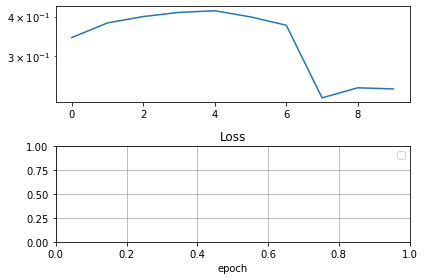

In [48]:
fig, axes = plt.subplots(nrows=2)

for i in range(len(output_list)):

    #dump = output_list[i]['dump']
    loss = -output_list[i]['dump_elite'][:, -1]
    
    trio = output_list[i]['trio']
    axes[0].semilogy(loss, label=trio)
    
    print(trio, len(loss))
    
#     m_list = []

#     for i in tqdm(range(0, len(loss), 100)):

#         df = dump['common'].iloc[:, 1:].loc[i]
#         #m = pairwise_distances(df[::10], n_jobs=-1)
#         m = df.std().mean()
#         m_list.append(m.mean())
        
#     axes[1].plot(m_list)
    
plt.grid(True, which='both')
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()
plt.tight_layout()

# dirname = os.path.join("../images/maleckar/reports/", case,)
# os.makedirs(dirname, exist_ok=True)     

# plt.savefig(os.path.join(dirname, "loss.png"), dpi=600)

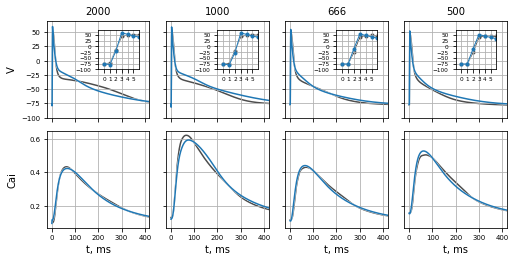

In [49]:
for i_output, output in enumerate(output_list):
    
    config = output['config']
    exp_cond_dict = {key: value for key, value in config['experimental_conditions'].items() if key != 'common'}
    phenotype_model_last = output['phenotype_model_last']
    
    model_name = config['filename_so'].split('/')[-2][1:]
    
    trio = output['trio']
    i_group, i_cell, i_case = trio

#     pairs = [(4, 4)]
    
#     if (i_group, i_cell) not in pairs:
#         continue
    
    
    suptitle = 'Group {} Cell {} Case {} {} model'.format(*trio, model_name)
    
    phenotype_model = []
    phenotype_control = []
    
    columns_model = config.get('columns_model', ['V'])
    columns_control = config.get('columns_control', ['V'])
    
    ylim_ca_bottom = 1e10
    ylim_ca_top = 0
    
    for e_key, e_value in exp_cond_dict.items():
        
        y = e_value['phenotype'][columns_control].values.copy()
        x = phenotype_model_last[e_key][columns_model].values[:len(y)].copy()
        
#         v_model = x[:, 0]
#         v_control = y[:, 0]
        
#         v_level = 0 # 0 # mV
#         shift_control = np.where(v_control > v_level)[0][0]
#         shift_model = np.where(v_model > v_level)[0]
#         if len(shift_model):
#             shift_model = shift_model[0]
#         else:
#             shift_model = 0

#         shift = shift_model - shift_control
        
#         print(shift_control, shift_model)

#         y = np.roll(y, shift, axis=0)
        
        if 'composite_' in config['loss']:
            y[:, 1], _, _ = autoscaling(signal_to_scale=y[:, 1],
                                        signal_reference=x[:, 1])    
            y[:, 1] *= 1000
            x[:, 1] *= 1000
            
            ca_min = min(y[:, 1].min(), x[:, 1].min())
            ca_max = max(y[:, 1].max(), x[:, 1].max())

            ylim_ca_bottom = ca_min if ca_min < ylim_ca_bottom else ylim_ca_bottom
            ylim_ca_top = ca_max if ca_max > ylim_ca_top else ylim_ca_top
            
        x = np.roll(x.T, 1, axis=1)
        y = np.roll(y.T, 1, axis=1)

        phenotype_model.append(x)
        phenotype_control.append(y)
        
    if config['loss'] == 'V_CaT_shared':

        phenotype_model_list = []
        phenotype_control_list = []

        for exp_cond_name, exp_cond in config['experimental_conditions'].items():

            if exp_cond_name == 'common':
                continue

            phenotype_control = exp_cond['phenotype'][columns_control].copy()
            phenotype_model   = phenotype_model_last[exp_cond_name][columns_model].values.copy()

            phenotype_model   = phenotype_model[:len(phenotype_control)]

            phenotype_model_list.append(phenotype_model)
            phenotype_control_list.append(phenotype_control.values)

        cat_model_concat = np.concatenate([x[:, 1] for x in phenotype_model_list])
        cat_control_concat = np.concatenate([x[:, 1] for x in phenotype_control_list])

        cat_control_concat_scaled, _, (alpha, beta) = autoscaling(signal_to_scale=cat_control_concat,
                                                                  signal_reference=cat_model_concat)
        
        ylim_ca_bottom = min(*cat_model_concat, *cat_control_concat_scaled)
        ylim_ca_top = max(*cat_model_concat, *cat_control_concat_scaled)
        
        cumlen = 0
        for i, x in enumerate(phenotype_control_list):

            phenotype_control_list[i][:, 1] = cat_control_concat_scaled[cumlen: cumlen + len(x)]
            cumlen += len(x)

        phenotype_model = []
        phenotype_control = []

        for i in range(len(phenotype_control_list)):
            phenotype_model.append(np.roll(phenotype_model_list[i].T, 1, axis=1))
            phenotype_control.append(np.roll(phenotype_control_list[i].T, 1, axis=1))
        
    ylim_ca = [ylim_ca_bottom - (ylim_ca_top - ylim_ca_bottom) * 0.05,
               ylim_ca_top    + (ylim_ca_top - ylim_ca_bottom) * 0.05]
    
    #ylim_ca = None # [0, .2e-3]
        
    plot_waveforms(phenotype_model, phenotype_control,
           xlim=[-20, 420], xticks=np.arange(0, 420, 100),
           yticks_list=[np.arange(-100, 56, 25), None],
           ylim_list=[[-100, 70], ylim_ca],
           titles=list(exp_cond_dict.keys()),
           ylabels=columns_model, xlabel='t, ms', #suptitle=suptitle, color_model=f'C{int(i_group) - 1}',
           inset_row_indices=[0], xlim_inset=[-1, 6], xticks_inset=np.arange(0, 6));
    
    filename = suptitle.replace(' ', '_') + '.png'
    #plt.savefig(os.path.join("../images/voigt/duplicates/", filename))

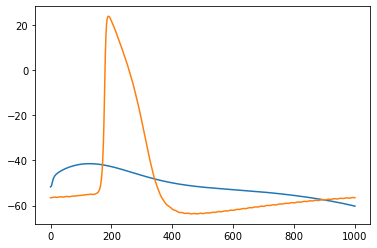

In [30]:
plt.plot(v_model)
plt.plot(v_control)

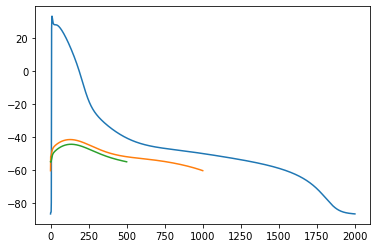

In [23]:
for x in phenotype_model:
    plt.plot(x.flatten())

In [63]:
rescale = lambda x: (x - np.min(x)) / np.ptp(x)

In [44]:
phenotype_model_last[e_key]

,CaSR1,CaSR2,CaSR3,CaSR4,Cai1,Cai2,Cai3,Cai4,Cass,d,...,Nai,Nass,fluo_1,fluo_2,fluo_3,fluo_4,fluo_ss,CaSR,Cai,fluo
0,5.465583,5.458878,5.449987,5.445740,0.000869,0.000861,0.000844,0.000814,0.000793,0.000014,...,9.978120,11.103346,-3.802161e-24,1.665651e-24,6.287790e-24,-4.465492e-23,1.527862e-23,5.450770,0.000836,-1.729615e-23
1,5.465416,5.458745,5.449922,5.445790,0.000869,0.000861,0.000844,0.000813,0.000793,0.002942,...,9.978133,11.156459,-2.599872e-24,1.141149e-24,4.325088e-24,-3.093535e-23,1.063695e-23,5.450737,0.000835,-1.199169e-23
2,5.465249,5.458610,5.449857,5.445838,0.000868,0.000860,0.000843,0.000816,0.000901,0.338528,...,9.978150,11.572800,-1.777946e-24,7.819000e-25,2.975442e-24,-2.142977e-23,7.340838e-24,5.450702,0.000837,-8.313732e-24
3,5.465081,5.458475,5.449791,5.445885,0.000868,0.000860,0.000843,0.000835,0.001091,0.598679,...,9.978168,11.576944,-1.215990e-24,5.358086e-25,2.047092e-24,-1.480950e-23,4.871632e-24,5.450666,0.000846,-5.749512e-24
4,5.464912,5.458339,5.449724,5.445932,0.000868,0.000859,0.000845,0.000869,0.001276,0.756567,...,9.978186,11.564185,-8.317414e-25,3.672099e-25,1.408127e-24,-1.017094e-23,-3.250049e-20,5.450630,0.000862,-2.030522e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,5.732379,5.725789,5.717188,5.713495,0.000915,0.000906,0.000888,0.000856,0.000834,0.000015,...,9.984644,11.168702,7.481327e-25,5.031593e-24,-6.043224e-24,-1.845899e-24,3.881748e-24,5.718134,0.000879,-1.671679e-24
497,5.732204,5.725648,5.717116,5.713538,0.000914,0.000905,0.000887,0.000855,0.000833,0.000015,...,9.984657,11.168393,7.051146e-25,4.628463e-24,-5.792006e-24,-1.080711e-24,4.667854e-24,5.718093,0.000878,-1.333915e-24
498,5.732028,5.725505,5.717044,5.713579,0.000914,0.000905,0.000887,0.000855,0.000832,0.000015,...,9.984671,11.168081,4.397775e-25,4.294341e-24,-5.372213e-24,7.939362e-27,5.595511e-24,5.718051,0.000878,-8.032307e-25
499,5.731851,5.725362,5.716970,5.713619,0.000913,0.000904,0.000886,0.000854,0.000832,0.000015,...,9.984684,11.167767,-7.195295e-26,4.039745e-24,-4.766484e-24,1.450156e-24,6.675147e-24,5.718007,0.000877,-6.061327e-26


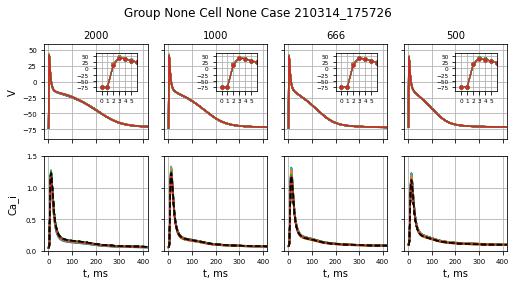

In [83]:
nrows, ncols = 2, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=plt.figaspect(nrows * 1.1 / ncols),
                         sharex='col', sharey='row',
                         )

for i_output, output in enumerate(output_list):
        
    if i_output < n_v:
        continue
    
    config = output['config']
    exp_cond_dict = {key: value for key, value in config['experimental_conditions'].items() if key != 'common'}
    phenotype_model_last = output['phenotype_model_last']
    
    suptitle = 'Group {} Cell {} Case {}'.format(*output['trio'])
    
    phenotype_model = []
    phenotype_control = []
    
    columns_model = config.get('columns_model', ['V'])
    columns_control = config.get('columns_control', ['V'])
    
    ylim_ca_bottom = 1e10
    ylim_ca_top = 0
    
    for e_key, e_value in exp_cond_dict.items():
        
        y = e_value['phenotype'][columns_control].values.copy()
        x = phenotype_model_last[e_key][columns_model].values[:len(y)].copy()
        
        if 'composite_' in config['loss']:
            
            x[:, 1] *= 1000
            
            #x[:, 1] = rescale(x[:, 1])
            
            y[:, 1], _, _ = autoscaling(signal_to_scale=y[:, 1],
                                        signal_reference=x[:, 1])    
            
            ca_min = min(y[:, 1].min(), x[:, 1].min())
            ca_max = max(y[:, 1].max(), x[:, 1].max())

            ylim_ca_bottom = ca_min if ca_min < ylim_ca_bottom else ylim_ca_bottom
            ylim_ca_top = ca_max if ca_max > ylim_ca_top else ylim_ca_top
            
        x = np.roll(x.T, 1, axis=1)
        y = np.roll(y.T, 1, axis=1)

        phenotype_model.append(x)
        phenotype_control.append(y)
        
    suptitle = 'Group {} Cell {} Case {}'.format(*output['trio'])
    
    ylim_ca = [ylim_ca_bottom - (ylim_ca_top - ylim_ca_bottom) * 0.05,
               ylim_ca_top    + (ylim_ca_top - ylim_ca_bottom) * 0.05]
    
    #ylim_ca = [0, 0.7] # grandi
    ylim_ca = [0, 1.5] # maleckar
    
    plot_waveforms(phenotype_model, phenotype_control,
                   fig=fig, axes=axes,
           xlim=[-20, 420], xticks=np.arange(0, 420, 100),
           yticks_list=[np.arange(-100, 56, 25), None],
           ylim_list=[[-90, 60], ylim_ca],
           titles=list(exp_cond_dict.keys()),
           ylabels=columns_model, xlabel='t, ms', suptitle=suptitle, color_model=f'C{i_output}',
           inset_row_indices=[0], xlim_inset=[-1, 6], xticks_inset=np.arange(0, 6));
    
    for i, CL in enumerate(exp_cond_dict.keys()):
        x = true[CL]['Ca_i'] * 1000
        x = np.roll(x, 1)
        #x = rescale(x)
        axes[1, i].plot(x, 'k--')
    
    #break
    
# plt.savefig("../images/synthetic/maleckar/waveforms_3.png")

In [81]:
true = {CL: pd.read_csv(f"../data/maleckar/original/phenotypes/phenotype_{CL}.csv") for CL in exp_cond_dict.keys()}

In [ ]:
import pyCardiac as pc

In [ ]:
exp_cond_dict = [item for item in config['experimental_conditions'].items() if item[0] != 'common']

m_index = pd.MultiIndex.from_product([[x[0] for x in exp_cond_dict],
                                      ['exp', 'model']], names=['CL', None])

df = pd.DataFrame(index=m_index, columns=['RP', 'APA', 'dVdt_max', 'APD80'])

for i_cond, (exp_cond_name, exp_cond) in enumerate(exp_cond_dict):

    exp = exp_cond['phenotype']['V'].values
    model = phenotype_model_last[exp_cond_name]['V'].values[:len(exp)]
    
    df.loc[idx[exp_cond_name, :], 'RP'] = exp[-1], model[-1]
    df.loc[idx[exp_cond_name, :], 'APA'] = np.ptp(exp), np.ptp(model)
    df.loc[idx[exp_cond_name, :], 'dVdt_max'] = np.max(np.diff(exp)), np.max(np.diff(model))
    
    t = np.arange(len(exp))
    df.loc[idx[exp_cond_name, :], 'APD80'] = [pc.signal.analysis.calculate_APD(t, exp),
                                              pc.signal.analysis.calculate_APD(t, model)]

## Pairplots

In [ ]:
plt.figure(figsize=plt.figaspect(1))

name_x, name_y = ('common', 'g_K1_scaler'), ('common', 'g_Na_scaler')
#name_x, name_y = ('1032', 'K_i'), ('1032', 'Na_i')

epoch = 0

df = dump.loc[epoch][::-1]
#c = np.arange(len(df)) # np.log(-df['common', 'fitness'])

scat = plt.scatter(df[name_x], df[name_y], c=df.index, s=16)
line_best, = plt.plot(df[name_x].loc[0],
                      df[name_y].loc[0], 'Xr')

if genes[name_x[0]][name_x[1]].get('is_multiplier', False):
    plt.xscale('log')
if genes[name_y[0]][name_y[1]].get('is_multiplier', False):
    plt.yscale('log')

plt.xlabel(name_x)
plt.ylabel(name_y)

plt.xlim(genes[name_x[0]][name_x[1]]['bounds'])
plt.ylim(genes[name_y[0]][name_y[1]]['bounds'])

plt.grid(which='both')
plt.tight_layout()
#plt.gcf().align_labels()

dirname = os.path.join("../images/kernik/syn/", case, 'pairplots', "_".join(name_x + name_y))
os.makedirs(dirname, exist_ok=True)

for epoch in tqdm(range(0, dump.index[-1][0])):
    df = dump.loc[epoch][::-1]
    #c = np.arange(len(df)) # np.log(-df['common', 'fitness'])
    scat.set_offsets(df[[name_x, name_y]])
    scat.set_array(df.index)
    line_best.set_data(df[name_x].loc[0], df[name_y].loc[0])
    plt.savefig(os.path.join(os.path.join(dirname, f"pairplot_{epoch:04d}.png")), dpi=200)

In [ ]:
df = dump.loc[idx[:, 0], 'common'].unstack().iloc[:, 1:]

for key in df:
    plt.semilogy(df[key], label=key)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# CellML

In [ ]:
df = output_list[1]['phenotype_model_last']['258']

In [ ]:
df_cellml = pd.read_csv("../misc/cellml/maleckar_G2_C2_210309_185119_258_data.csv")
df_cellml.columns = [c[-1].split()[0] for c in df_cellml.columns.str.split('|')]

In [ ]:
%matplotlib inline

In [ ]:
for c in df:
    
    if c in df_cellml:

        plt.plot(df[c])
        plt.plot(df_cellml[c])
        plt.title(c)
        plt.show()

In [ ]:
plt.plot(A['ical_tor'])
plt.plot(df_cellml['i_Ca_L_ToR_ORd'])

In [ ]:
for c in A:
    
    if c in df_cellml:

        plt.plot(A[c])
        plt.plot(df_cellml[c])
        plt.title(c)
        plt.show()

# Prepare baselines

In [16]:
import numpy as np
import pandas as pd
import ctypes
import matplotlib.pyplot as plt

import time
import os

import sys
sys.path.append("../")

from src.helpers import update_array_from_kwargs, get_value_by_key

# dirname = '../src/model_ctypes/_maleckar_ical_ghk_tor/'
# filename_so = os.path.join(dirname, 'maleckar.so')

dirname = '../src/model_ctypes/_koivumaki/'
filename_so = os.path.join(dirname, 'koivumaki.so')

# dirname = '../src/model_ctypes/_kernik_clancy/'
# filename_so = os.path.join(dirname, 'model.so')

# dirname = '../src/model_ctypes/_grandi/'
# filename_so = os.path.join(dirname, 'model.so')

filename_so_abs = os.path.abspath(filename_so)

model = ctypes.CDLL(filename_so_abs)

model.initialize_states_default.argtypes = [
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
]

model.initialize_states_default.restype = ctypes.c_void_p


# model.initialize_constants_default.argtypes = [
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
# ]

# model.initialize_constants_default.restype = ctypes.c_void_p


# model.computeRates.argtypes = [
#     ctypes.c_double,
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
# ]
# model.computeRates.restype = ctypes.c_void_p


# model.computeVariables.argtypes = [
#     ctypes.c_double,
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
# ]
# model.computeVariables.restype = ctypes.c_void_p


model.run.argtypes = [
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_int,
    ctypes.c_double,
    ctypes.c_double,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS')#,
    #np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS'),
    #np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
]

model.run.restype = ctypes.c_int



# model.run_chain.argtypes = [
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     ctypes.c_int,
#     ctypes.c_double,
#     ctypes.c_double,
#     ctypes.c_int,
#     ctypes.c_double,
#     ctypes.c_double,
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS'),
#     ctypes.c_int, # target_index

# ]

# model.run_chain.restype = ctypes.c_int


legend_algebraic = pd.read_csv(os.path.join(dirname, "legend_algebraic.csv"), index_col='name')
legend_algebraic = legend_algebraic.iloc[:, :0]
legend_algebraic['value'] = 0.0

legend_constants = pd.read_csv(os.path.join(dirname, "legend_constants.csv"), index_col='name')['value']
legend_states = pd.read_csv(os.path.join(dirname, "legend_states.csv"), index_col='name')['value']

In [ ]:
# S = np.zeros(len(legend_states)) #  np.loadtxt("S.txt")
# C = legend_constants.values #  np.loadtxt("C.txt")

model.initialize_states_default(legend_states.values, legend_constants.values)

In [ ]:
# S = np.zeros(len(legend_states)) #  np.loadtxt("S.txt")
# C = np.zeros(len(legend_constants)) #  np.loadtxt("C.txt")

# model.initialize_states_default(S)
# model.initialize_constants_default(C)

In [ ]:
# S = legend_states.copy()
# C = legend_constants.copy()

# A = legend_algebraic.copy()
# R = np.zeros(len(legend_states))

In [17]:
def create_C_S(organism, config, exp_cond_name, verbose=False):

    legend = config['runtime']['legend']
    genes_dict = config['runtime']['genes_dict']
    constants_dict = config['runtime']['constants_dict']
    
    print(constants_dict[exp_cond_name])

    genes_current = organism['genes'][['common', exp_cond_name]]
    constants_dict_current = {**constants_dict['common'],
                              **constants_dict[exp_cond_name],
                             }

    C = legend['constants'].copy()
    S = organism['state'][exp_cond_name].copy()

    for i in range(len(genes_current)):
        g_name = genes_current.index.get_level_values(1).to_list()[i]

        if g_name in legend['constants'].index:
            for ecn in ['common', exp_cond_name]:
                if g_name in genes_dict[ecn]:
                    if genes_dict[ecn][g_name]['is_multiplier']:
                        C[g_name] *= genes_current[ecn, g_name]
                    else:
                        C[g_name] = genes_current[ecn, g_name]

        if g_name in legend['states'].index:
            for ecn in ['common', exp_cond_name]:
                if g_name in genes_dict[ecn]:
                    if genes_dict[ecn][g_name]['is_multiplier']:
                        S[g_name] *= genes_current[ecn, g_name]
                    else:
                        S[g_name] = genes_current[ecn, g_name]
                        

    for c_name, c in constants_dict_current.items():
        if verbose:
            print(c_name, c)
        if c_name in legend['constants'].index:
            C[c_name] = c
        if c_name in legend['states'].index:
            S[c_name] = c

    return C, S

In [18]:
config['runtime']['constants_dict']

{'common': {'STIM_LEVEL': 1.5, 'Na_o': 140, 'Ca_o': 2.0, 'K_o': 4},
 '2064': {'STIM_PERIOD': 2.064},
 '1032': {'STIM_PERIOD': 1.032},
 '516': {'STIM_PERIOD': 0.516},
 '344': {'STIM_PERIOD': 0.344},
 '258': {'STIM_PERIOD': 0.258}}

In [31]:
output = output_list[2]

genes = output['dump_last'].iloc[0, 1:]

phenotype_model_last = output['phenotype_model_last']
config = output['config']

state = pd.DataFrame({exp_cond_name: phenotype_model_last[exp_cond_name].iloc[-1]
                      for exp_cond_name in config['experimental_conditions'] if exp_cond_name != 'common'})

C, S = create_C_S(dict(genes=genes, state=state), config, '258', verbose=True)

{'STIM_PERIOD': 0.258}
STIM_LEVEL 1.5
Na_o 140
Ca_o 2.0
K_o 4
STIM_PERIOD 0.258


In [ ]:
C['g_K1'] *= 100

In [ ]:
C['g_K1'] *= 0.5
C['P_Na'] *= 0.6
C['g_Ca_L'] *= 0.5
#P_Ca_L_ToR_ORd*0.5

In [ ]:
# C['stim_amplitude'] *= 2
# C['stim_amplitude']

In [ ]:
S = legend_states.copy()
C = legend_constants.copy()

In [ ]:
C['stim_period'] = 1
C['stim_duration'] = 0.001
C['stim_amplitude'] = -60
#C['pca_tor'] = 0 # 5e-5 * 4
#C['g_Ca_L'] = 3 * 6.75

In [ ]:
C['pca_tor'] = 5e-5 * 4


In [ ]:
C['stim_period'] = 1

In [ ]:
#C.to_csv("../../../projects/Rheeda/G3C1/andrey_constants.csv")

In [ ]:
C['fluo_k_on'] = 0
C['fluo_k_off'] = 0

In [32]:
t_sampling = config['t_sampling']
# t_sampling = 1

#stim_period = C['STIM_PERIOD']
stim_period = C[config['stim_period_legend_name']] # C[config['stim_period_legend_name']]
#stim_period = get_value_by_key(C, legend_constants, 'stim_period')
n_samples_per_stim = int(stim_period / t_sampling)

n_beats = 100
tol = 1e-4

chain_length = 50
v_threshold = 1e-1
t_safe = 5e-2

output = np.zeros((n_samples_per_stim * n_beats + 1, len(S)))
output_V = np.zeros((n_samples_per_stim * n_beats + 1, chain_length))

output_A = np.zeros((n_samples_per_stim * n_beats + 1, len(legend_algebraic)))
output_t = np.zeros((n_samples_per_stim * n_beats + 1))

In [ ]:
C['stim_amplitude'] = -180
status = model.run_chain(S.values.copy(), C.values.copy(),
                         chain_length, v_threshold, t_safe,
                         n_beats, t_sampling, tol, output, output_V, -1)

print(status)

In [33]:
status = model.run(S.values.copy(), C.values.copy(),
                   n_beats, t_sampling, tol, output)

print(status)

2


In [34]:
#output = np.loadtxt(os.path.join(dirname, "output.txt"))

In [35]:
output = pd.DataFrame(output, columns=legend_states.index)
output.head()

name,CaSR1,CaSR2,CaSR3,CaSR4,Cai1,Cai2,Cai3,Cai4,Cass,d,...,Nai,Nass,fluo_1,fluo_2,fluo_3,fluo_4,fluo_ss,CaSR,Cai,fluo
0,0.3595,0.349102,0.328027,0.296031,0.000155,0.000151,0.000143,0.000125,0.000105,0.000010,...,10.211539,10.314744,0.000087,0.000086,0.000082,0.000073,0.000063,0.319947,0.000137,0.000079
1,0.3595,0.349101,0.328038,0.296118,0.000155,0.000151,0.000142,0.000125,0.000106,0.001799,...,10.211540,10.358592,0.000087,0.000085,0.000081,0.000073,0.000063,0.319989,0.000137,0.000079
2,0.3595,0.349099,0.328050,0.296205,0.000155,0.000151,0.000142,0.000125,0.000129,0.346946,...,10.211547,10.924784,0.000087,0.000085,0.000081,0.000073,0.000064,0.320030,0.000137,0.000079
3,0.3595,0.349098,0.328061,0.296291,0.000154,0.000150,0.000141,0.000127,0.000170,0.603363,...,10.211555,10.916298,0.000087,0.000085,0.000081,0.000073,0.000067,0.320071,0.000138,0.000078
4,0.3595,0.349096,0.328072,0.296377,0.000154,0.000150,0.000141,0.000131,0.000213,0.759038,...,10.211562,10.887319,0.000086,0.000085,0.000081,0.000073,0.000074,0.320112,0.000140,0.000078


In [36]:
err_abs = output.iloc[-1] - output.iloc[0]
err_rel = err_abs / output.iloc[0] * 100

#items = ['Na_i', 'K_i', 'V', 'Ca_i']
items = ['Nai', 'Ki']

df_err= pd.DataFrame([err_rel[items], err_abs[items]],
                     index=['err_rel', 'err_abs'])
df_err

name,Nai,Ki
err_rel,0.504082,-0.034048
err_abs,0.051474,-0.044079


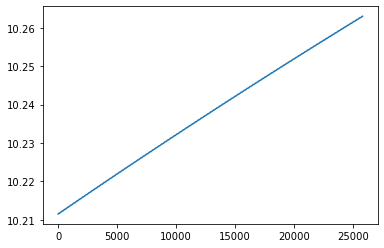

In [37]:
plt.plot(output.Nai)
#plt.plot(output.Nai[-1033:])

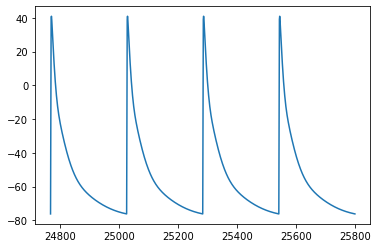

In [38]:
plt.plot(output.V[-1032-1:])

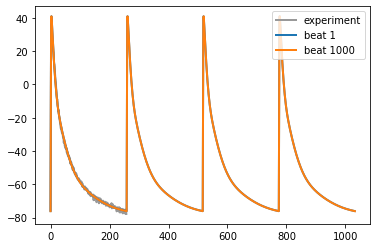

In [43]:
v = output_list[2]['config']['experimental_conditions']['258']['phenotype'].V.values
plt.plot(v, color='0.6', lw=2, label='experiment')

plt.plot(output.V[:1032].values, lw=2, label='beat 1')
plt.plot(output.V[-1033:].values, lw=2, label='beat 1000')

plt.legend()
# plt.xlim(-10, 410)

In [20]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [21]:
for i in range(n_beats):
    CL = 1032
    plt.plot(output.V[CL*i: CL*(i + 1) + 1])

In [ ]:
plt.plot(output.Ca_sr)

In [ ]:
# plt.plot(output.Ca_up)
# plt.plot(output.Ca_rel)

In [ ]:
A = legend_algebraic.values.flatten()
R = np.zeros(len(legend_states))

#output = df.copy()
A_list = np.zeros((len(output), len(A)))

for i in range(len(output)):
    model.computeVariables(0, C.values, R, output.iloc[i].values, A)
    A_list[i] = A.copy()

In [ ]:
A = pd.DataFrame(A_list, columns=legend_algebraic.index)

In [ ]:
plt.plot(A.i_Ca_L)
plt.plot(A.ical_tor)

#plt.xlim(990, 1200)

In [ ]:
#output.to_csv("../../../projects/Rheeda/G3C1/andrey_normal.csv", index=False)

In [ ]:
tail = output[-1000 * 10 - 1:].reset_index()

In [ ]:
tail

In [ ]:
plt.plot(tail.V)

In [ ]:
# tail.to_csv("../../../projects/Rheeda/G3C1/andrey_fibrosis.csv", index=False)

In [ ]:
tail

# 3D

spherical stimulus of radius 0.75mm

stimulus[0].strength     = 3e2 units: uA/cm^3(3D current)

stimulus[0].duration     = 5 [ms]

$(100 um)^3 \cdot 300 uA / cm^3 = (10^2 \cdot 10^{-6} m)^3 \cdot 3 \cdot 10^{-4} \cdot 10^6 A/m^{-3} = 10^{-12} m^3 \cdot 3 \cdot 10^2 A / m^3 = 3 \cdot 10^{-10} A = 0.3 nA$

Cm = 0.05 nF

In [ ]:
model.computeRates.argtypes = [
    ctypes.c_double,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
]
model.computeRates.restype = ctypes.c_void_p

In [ ]:
def calculate_diffusion(V, g_gap_junc_tensor):
        
    I = np.zeros_like(V)
        
    for axis in range(V.ndim):

        indices_next, indices_prev = [slice(None)] * 3, [slice(None)] * 3
        indices_next[axis] = slice(1, None)        
        indices_prev[axis] = slice(0, -1)
        indices_next = tuple(indices_next)
        indices_prev = tuple(indices_prev)

        I[indices_next] = I[indices_next] - g_gap_junc_tensor[axis] * (V[indices_prev] - V[indices_next])
        I[indices_prev] = I[indices_prev] - g_gap_junc_tensor[axis] * (V[indices_next] - V[indices_prev])
            
    return I


def is_pacing_condition(t, ix, iy, iz, SIZE, stim_size):
    
    X_SIZE, Y_SIZE, Z_SIZE = SIZE

    pacing_condition =  (X_SIZE / 2 - stim_size / 2 <= ix <= X_SIZE / 2 + stim_size / 2)
    pacing_condition &= (Y_SIZE / 2 - stim_size / 2 <= iy <= Y_SIZE / 2 + stim_size / 2)
    pacing_condition &= (iz == 0)

    pacing_condition &= t < 5e-3
    
    return pacing_condition


def is_pacing_condition_sphere(t, ix, iy, iz, SIZE, R):
    
    X_SIZE, Y_SIZE, Z_SIZE = SIZE
    
    x_center, y_center, z_center = X_SIZE / 2, Y_SIZE / 2, 0

    pacing_condition =  (ix - x_center)**2 + (iy - y_center)**2 + (iz - z_center)**2 < R**2
    pacing_condition &= t < 5e-3
    
    return pacing_condition

In [ ]:
dt = 3.5e-5

t_end = 2e-2
t_sampling = 1e-4 # 1e-4

sigma_l = 0.126 #  S/m
h = 100  # um

g_gap_junc = sigma_l * h # 5.0
g_gap_junc_tensor = [g_gap_junc,
                     g_gap_junc / 5,
                     g_gap_junc / 5]

N = int(t_end / dt)
step_print = int(t_sampling / dt)


# X_SIZE, Y_SIZE, Z_SIZE = 61, 41, 21

X_SIZE, Y_SIZE, Z_SIZE = 101, 1, 1

SIZE = X_SIZE, Y_SIZE, Z_SIZE


output = output_list[3]

genes = output['dump_last'].iloc[0, 1:]
phenotype_model_last = output['phenotype_model_last']
config = output['config']

state = pd.DataFrame({exp_cond_name: phenotype_model_last[exp_cond_name].iloc[-1]
                      for exp_cond_name in config['experimental_conditions'] if exp_cond_name != 'common'})

C, S = create_C_S(dict(genes=genes, state=state), config, '344')
#C['P_Na'] *= 4

A = np.zeros(70)
R = np.zeros_like(S)

S_tissue = np.tile(S.values, (*SIZE, 1))
C_tissue = np.tile(C.values, (*SIZE, 1))
C_tissue[:, :, :, 7] = 0
R_tissue = np.zeros_like(S_tissue)
A_tissue = np.tile(A, (*SIZE, 1))

timespace = []
#result = np.zeros((*SIZE, int(t_end / t_sampling)))
result = []
i_print = 0
t = 0

stim_size = 1 # 10

In [ ]:
IS_PARALLEL = False

for it in tqdm(range(N)):
    
    if it % step_print == 0:
        #result[:, :, :, i_print] = S_tissue[:, :, :, 0]
        
        i_print += 1
        result.append(S_tissue[:, :, :, 0])
        timespace.append(t)
        
    if IS_PARALLEL:

        C_tissue[X_SIZE / 2 - stim_size / 2: X_SIZE / 2 + stim_size / 2,
                 Y_SIZE / 2 - stim_size / 2: Y_SIZE / 2 + stim_size / 2,
                 0, 7] = -300 if t < 5e-3 else 0 

        args = zip([t] * (X_SIZE * Y_SIZE * Z_SIZE),
                   C_tissue.reshape(-1, C_tissue.shape[-1]),
                   R_tissue.reshape(-1, R_tissue.shape[-1]),
                   S_tissue.reshape(-1, S_tissue.shape[-1]),
                   A_tissue.reshape(-1, A_tissue.shape[-1]))

        with Pool(2) as p:
            R_list = p.map(f, args)

        R_tissue = np.array(R_list).reshape(R_tissue.shape)
        
    else:

        for ix in range(X_SIZE):
            for iy in range(Y_SIZE):
                for iz in range(Z_SIZE):

                    #stim_amplitude = -120 # -10 / 0.05 # -0.3 / 0.05
                    #C['stim_amplitude'] = stim_amplitude if is_pacing_condition(t, ix, iy, iz, SIZE, stim_size) else 0
                    #C['stim_amplitude'] = -10 / 0.05 if is_pacing_condition_sphere(t, ix, iy, iz, SIZE, R=7.5) else 0
                    C['stim_amplitude'] = -120 if ix == 0 and (t % 1) < 5e-3 else 0

                    model.computeRates(t,
                                       C.values,
                                       R_tissue[ix, iy, iz],
                                       S_tissue[ix, iy, iz],
                                       A.copy())

    V = S_tissue[:, :, :, 0]
    assert not np.any(np.isnan(V))
    I_gap_junc = calculate_diffusion(V, g_gap_junc_tensor)
    
    R_tissue[:, :, :, 0] = R_tissue[:, :, :, 0] - I_gap_junc * 1000
    
    S_tissue = S_tissue + dt * R_tissue            
    t = it * dt

In [ ]:
result = np.stack(result, axis=3)
timespace = np.array(timespace)

In [ ]:
i1, i2 = 30, 60
#i1, i2 = 15, 25

for i in 0, i1, i2:
    plt.plot(timespace, result[i, 0, 0], '.-', label=str(i))
    t = np.argmax(np.diff(result[i, 0, 0]))
    plt.plot(timespace[t], result[i, 0, 0, t], 'ok')

t1 = np.argmax(np.diff(result[i1, 0, 0]))
t2 = np.argmax(np.diff(result[i2, 0, 0]))

CV = (np.abs(i1 - i2) * h) / (np.abs(timespace[t1] - timespace[t2]))# # um / s
CV = CV * 1e-6 * 100 # cm / s

print(CV)

In [ ]:
#### ixc, iyc, izc = map(lambda x: int(x // 2), SIZE)
ic = ixc, iyc, izc

In [ ]:
plt.plot(result[ixc, iyc, 0], '.-')
plt.plot(result[ic], '.-')
plt.plot(result[ixc, iyc, -1], '.-')

In [ ]:
t = np.argmax(np.diff(result[:, 0, 0]), axis=-1)
plt.plot(t)

In [ ]:
np.abs(t1 - t2)

In [ ]:
a = result[:, 0, 0, :]

In [ ]:
ax = np.diff(result[:, iyc, izc, :], axis=-1)
ay = np.diff(result[ixc, :, izc, :], axis=-1)
az = np.diff(result[ixc, iyc, :, :], axis=-1)

In [ ]:
plt.plot(np.argmax(ax, axis=1))
plt.plot(np.argmax(ay, axis=1))
plt.plot(np.argmax(az, axis=1))

plt.axhline(50, color='0.5')

In [ ]:
fig, axes = plt.subplots(2, 2,
                        #sharex='col', sharey='row',
                        )

t = 60

axes[0, 0].imshow(result[:, :, 0, t],
           vmin=-80, vmax=40,
           #aspect=10,
          )
axes[0, 0].set_xlabel('y')
axes[0, 0].set_ylabel('x')

axes[0, 1].imshow(result[:, iyc, :, t],
           vmin=-80, vmax=40,
           #aspect=10,
          )

axes[0, 1].set_xlabel('z')
axes[0, 1].set_ylabel('x')

im = axes[1, 0].imshow(result[ixc, :, :, t].T,
           vmin=-80, vmax=40,
           #aspect=10,
          )

axes[1, 0].set_xlabel('y')
axes[1, 0].set_ylabel('z')

axes[1, 1].set_visible(False)

plt.colorbar(im)

plt.tight_layout()

# CV

In [ ]:
output = output_list[-1]

genes = output['dump_last'].iloc[0, 1:]
phenotype_model_last = output['phenotype_model_last']
config = output['config']

state = pd.DataFrame({exp_cond_name: phenotype_model_last[exp_cond_name].iloc[-1]
                      for exp_cond_name in config['experimental_conditions'] if exp_cond_name != 'common'})

result = []

for CL in state: # tqdm([2000, 1000, 500, 250]): # state:
    
    C, S = create_C_S(dict(genes=genes, state=state), config, CL)# CL)
    C['stim_amplitude'] = -180
    #C['stim_period'] = CL / 1000.
    S = state['344'].copy()
    
    t_sampling = 0.001
    # t_sampling = 1

    #stim_period = C['STIM_PERIOD']
    stim_period = C[config['stim_period_legend_name']] # C[config['stim_period_legend_name']]
    #stim_period = get_value_by_key(C, legend_constants, 'stim_period')
    n_samples_per_stim = int(stim_period / t_sampling)

    n_beats = 50
    tol = 1e-4

    chain_length = 50
    v_threshold = 1e-1
    t_safe = 5e-2

    output = np.zeros((n_samples_per_stim * n_beats + 1, len(S)))
    output_V = np.zeros((n_samples_per_stim * n_beats + 1, chain_length))

    # output_A = np.zeros((n_samples_per_stim * n_beats + 1, len(legend_algebraic)))
    # output_t = np.zeros((n_samples_per_stim * n_beats + 1))

    status = model.run_chain(S.values.copy(), C.values.copy(),
                             chain_length, v_threshold, t_safe,
                             n_beats, t_sampling, tol, output, output_V, -1)
    
    CL = int(CL)
    
    i1, i2 = 20, 30
    v1 = output_V[-CL: -CL + 50, i1]
    v2 = output_V[-CL: -CL + 50, i2]

    t1 = np.argmax(np.diff(v1))
    t2 = np.argmax(np.diff(v2))

    CV = (np.abs(i1 - i2) * 100) / (np.abs(t1 - t2) * t_sampling)# # um / s
    CV = CV * 1e-6 * 100 # cm / s

    result.append([CL, CV])
    
    plt.plot(output_V[-CL * 2:, i1])
    plt.show()
    
    plt.plot(v1)
    plt.plot(v2)
    plt.show()
    

In [ ]:
result = np.array(result)

plt.plot(result[:, 0], result[:, 1], '.-')

In [ ]:
plt.plot(output_V[-1032:, 0])

In [ ]:
plt.plot(v1)
plt.plot(v2)

# Euler

In [ ]:
dt = 3.5e-5

t_end = 1.
t_sampling = 1e-3

N = int(t_end / dt)
step_print = int(t_sampling / dt)

C, S = create_C_S(dict(genes=genes, state=state), config, '1032')

A = np.zeros(70)
R = np.zeros_like(S)

result = []
i_print = 0
t = 0

for it in tqdm(range(N)):
    
    if it % step_print == 0:
        result.append(S)
        i_print += 1
    
    C['stim_amplitude'] = -60 if t <= 1e-3 else 0

    model.computeRates(t,
                       C.values,
                       R,
                       S.values,
                       A.copy())
    
    assert not S.isna().any()

    S = S + dt * R           
    t += dt

In [ ]:
result = pd.concat(result, axis=1).T
result.reset_index(inplace=True)

In [ ]:
plt.plot(result.V)

# Profiling

In [ ]:
# l = []
# for i in range(128):
#     df = pd.read_csv(os.path.join(config_path, f"mpi/report_{i:04d}.csv")).iloc[1:]
#     df['rank'] = i
#     l.append(df)
    
# df = pd.concat(l)
# #df.set_index('rank', append=True, inplace=True)

In [ ]:
# sns.barplot(y='gather_allgather', data=df, x='rank', palette="Blues")
# #sns.barplot(y='calc', data=df, x='rank', palette="Reds")